<a href="https://colab.research.google.com/github/lecoqm/ensae-prog23/blob/main/Pr%C3%A9sentation_OPINION_DYNAMICS_AND_BOUNDED_CONFIDENCE_MODELS%2C_ANALYSIS%2C_AND_SIMULATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OPINION DYNAMICS AND BOUNDED CONFIDENCE MODELS, ANALYSIS, AND SIMULATION
# Rainer Hegselmann, Ulrich Krause, 

## Antoine Gilson, Mathis Lecoq, Nicolas Noldus

importation des bibliothèques




In [55]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1000)  # permet d'obtenir la même simulation malgré l'aléatoire

## Création de la fonction selon le modèle bonded confidence

On crée une fonction qui permet, à partir d'un vecteur d'opinion initial et des bornes, de renvoyer l'évolution de l'opinion au cours du temps.

In [56]:
def opinion_change(opinions,epsilon_inf,epsilon_sup,time):
    nb_opinions=len(opinions)
    opinions_over_time=np.zeros((time,nb_opinions))  # on initialise la matrice de changement d'opinion
    opinions_over_time[0]=opinions
    new_opinions=np.zeros(nb_opinions)
    for t in range (1,time):
        for i in range(nb_opinions):
            # on crée le vecteur de confiance de l'agent i envers les autres agents
            neighbours=np.zeros(nb_opinions)
            for j in range(nb_opinions):
                if opinions[j]<=opinions[i]+epsilon_sup and opinions[j]>=opinions[i]-epsilon_inf:
                    neighbours[j]=1
            # on modifie les opinions
            new_opinions[i]=sum(opinions*neighbours)/sum(neighbours)
        opinions=new_opinions
        opinions_over_time[t]=opinions
    return opinions_over_time

On crée une fonction permettant d'afficher un graphique représentatant l'évolution de chaque individu au cours du temps en fonction du temps. Elle part une distribution suivant la loi uniforme des individus.

In [57]:
def graph_evolution(nb_opinions,epsilon_inf,epsilon_sup,time):
    opinions=np.random.rand(nb_opinions)
    times=np.arange(time)
    opinions_over_time=opinion_change(opinions,epsilon_inf,epsilon_sup,time)
    plt.plot(times,opinions_over_time)   
    plt.show()

On peut tester la fonction suivant diverses ouvertures.

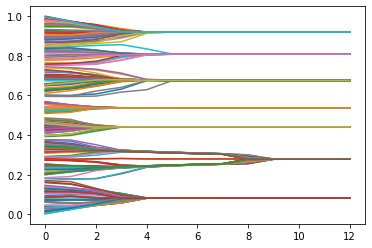

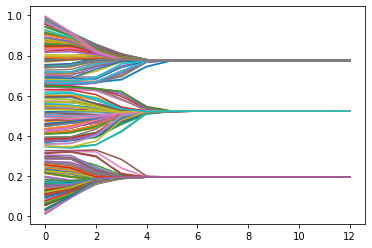

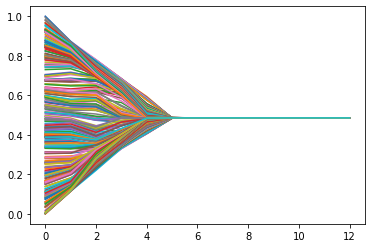

In [58]:
graph_evolution(300,0.05,0.05,13)
graph_evolution(300,0.15,0.15,13)
graph_evolution(300,0.25,0.25,13)

Ainsi que sous différents biais.

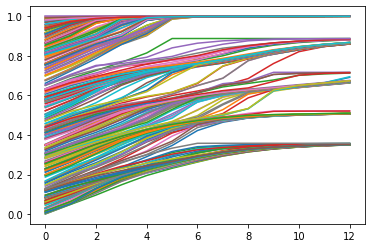

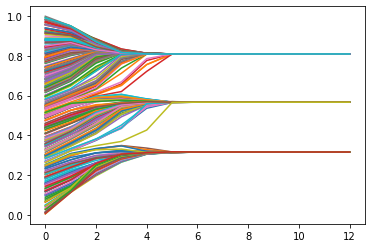

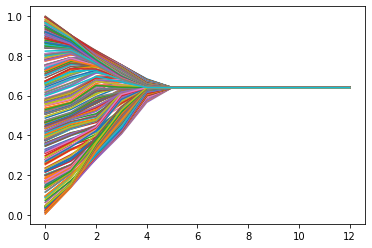

In [59]:
graph_evolution(300,0.00,0.10,13)
graph_evolution(300,0.10,0.20,13)
graph_evolution(300,0.20,0.30,13)

## Création d'une fonction permettant de vérifier la convergence

La fonction convergence permet de trouver les valeurs de convergence.
La fonction test_convergence permet de voir si il y a une unique valeur de convergence.

In [60]:
def convergence(opinions,epsilon_inf,epsilon_sup):
    change=1
    change_1=np.zeros(4)
    # on lance la fonction initiale jusqu'à ce que chaque individu ait stabilisé son opinion
    while change>0.0001:
        opinions_over_time=opinion_change(opinions,epsilon_inf,epsilon_sup,5)
        for i in range(4):
            diff=opinions_over_time[i+1]-opinions_over_time[i]
            change_1[i]=max(diff)
        opinions=opinions_over_time[4]
        change=max(change_1)
    # on relève les valeurs vers lesquelles les individus ont convergés
    convergence=[opinions[0]]
    for opinion in opinions: # on parcours toutes les opinions finales
        test=True
        for c in convergence: # on vérifie que l'opinion n'est pas déjà ajouter à la convergence
            if abs(c-opinion)<0.00001:
                test=False
        if test:
            convergence.append(opinion)
    return convergence

def test_convergence(epsilon_inf,epsilon_sup):
    test=True
    for i in range (10): # on répète l'expérience 10 fois pour éviter des faux-positifs.
        opinions=np.random.rand(400)
        conv=convergence(opinions,epsilon_inf,epsilon_sup)
        if len(conv)>1 and test==True: # on tolère une non-convergence pour éviter les faux-négatifs.
            test=False
        elif len(conv)>1 and test==False:
            return False
    return True

On peut tester la fonction avec les résultats précédents.

In [61]:
print(test_convergence(0.15,0.15))
print(test_convergence(0.25,0.25))
print(test_convergence(0.10,0.20))
print(test_convergence(0.20,0.30))

False
True
False
True


## Recheche de l'ouverture permettant la convergence

On crée une dichotomie permettant de trouver l'ouverture à partir de laquelle on observe une convergence.

In [62]:
def dichotomie(biais):
    epsilon_min=0
    epsilon_max=1
    epsilon=(epsilon_min+epsilon_max)/2
    while epsilon_max-epsilon_min>0.001:
        # pour vérifier que le programme s'execute bien : 
        # print(epsilon)
        if test_convergence(epsilon-biais,epsilon+biais):
            epsilon_max=epsilon
        else:
            epsilon_min=epsilon
        epsilon=(epsilon_min+epsilon_max)/2
    return epsilon

On regarde la valeur de convergence: 

In [63]:
# le programme prend 5 minutes à s'éxécuter
epsilon=dichotomie(0.)
print(epsilon)

epsilon=dichotomie(0.04)
print(epsilon)

epsilon=dichotomie(0.08)
print(epsilon)

0.22900390625
0.23681640625
0.23486328125


## En modifiant la distribution initiale

Jusqu'ici, les distributions étaient toutes similaires, suivant la loi uniforme sur le segment $[0;1]$. On s'interresse maintenant à deux nouvelles distributions initiales :      


*   une distribution consensuelle : 8/10 des opinions suivent la loi uniforme sur $[0,25;0,75]$, 1/10 suivent la loi uniforme sur $[0,75;1]$ et 1/10 suivent la loi uniforme sur $[0;0,25]$
*   une distribution extreme : 1/5 des opinions suivent la loi uniforme sur $[0,25;0,75]$, 2/5 suivent la loi uniforme sur $[0,75;1]$ et 2/5 suivent la loi uniforme sur $[0;0,25]$

Les opinions suivent cette forme :


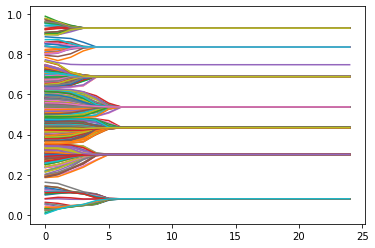

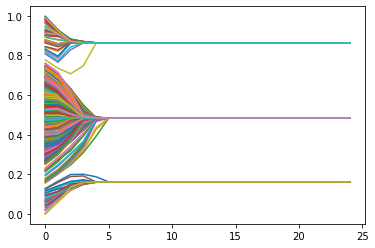

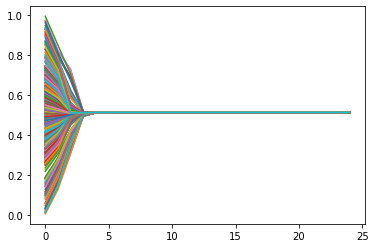

In [64]:
def graph_evolution_consensuelle(nb_opinions,epsilon_inf,epsilon_sup,time):
    nb_opinions=nb_opinions//10
    opinions_1=np.random.rand(nb_opinions)/4
    opinions_2=np.random.rand(8*nb_opinions)/2+0.25
    opinions_3=np.random.rand(nb_opinions)/4+0.75
    opinions=np.concatenate((opinions_1,opinions_2,opinions_3))
    times=np.arange(time)
    opinions_over_time=opinion_change(opinions,epsilon_inf,epsilon_sup,time)
    plt.plot(times,opinions_over_time)   
    plt.show()

graph_evolution_consensuelle(500,0.05,0.05,25)
graph_evolution_consensuelle(500,0.15,0.15,25)
graph_evolution_consensuelle(500,0.25,0.25,25)

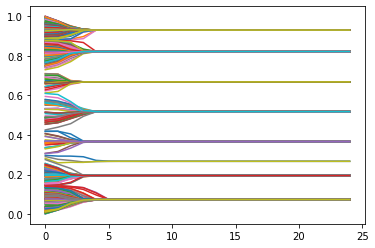

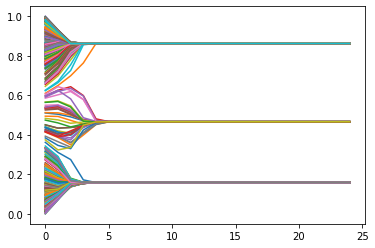

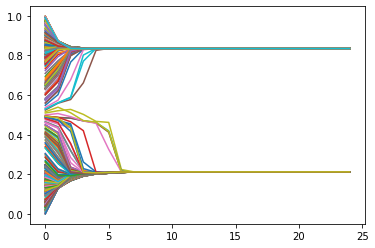

In [65]:
def graph_evolution_extreme(nb_opinions,epsilon_inf,epsilon_sup,time):
    nb_opinions=nb_opinions//5
    opinions_1=np.random.rand(2*nb_opinions)/4
    opinions_2=np.random.rand(nb_opinions)/2+0.25
    opinions_3=np.random.rand(2*nb_opinions)/4+0.75
    opinions=np.concatenate((opinions_1,opinions_2,opinions_3))
    times=np.arange(time)
    opinions_over_time=opinion_change(opinions,epsilon_inf,epsilon_sup,time)
    plt.plot(times,opinions_over_time)   
    plt.show()

graph_evolution_extreme(500,0.05,0.05,25)
graph_evolution_extreme(500,0.15,0.15,25)
graph_evolution_extreme(500,0.25,0.25,25)

On remarque que l'ouverture nécessaire pour la convergence est différente.
On peut donc la recalculer.

In [66]:
def test_convergence_consensuelle(epsilon_inf,epsilon_sup):
    test=True
    for i in range (10): # on répète l'expérience 10 fois pour éviter des faux-positifs.
        opinions_1=np.random.rand(50)/4
        opinions_2=np.random.rand(400)/2+0.25
        opinions_3=np.random.rand(50)/4+0.75
        opinions=np.concatenate((opinions_1,opinions_2,opinions_3))
        conv=convergence(opinions,epsilon_inf,epsilon_sup)
        if len(conv)>1 and test==True: # on tolère une non-convergence pour éviter les faux-négatifs.
            test=False
        elif len(conv)>1 and test==False:
            return False
    return True

def dichotomie_consensuelle(biais):
    epsilon_min=0
    epsilon_max=1
    epsilon=(epsilon_min+epsilon_max)/2
    while epsilon_max-epsilon_min>0.001:
        # pour vérifier que le programme s'execute bien : 
        # print(epsilon)
        if test_convergence_consensuelle(epsilon-biais,epsilon+biais):
            epsilon_max=epsilon
        else:
            epsilon_min=epsilon
        epsilon=(epsilon_min+epsilon_max)/2
    return epsilon

epsilon=dichotomie_consensuelle(0.)
print(epsilon)

0.20263671875


In [67]:
def test_convergence_extreme(epsilon_inf,epsilon_sup):
    test=True
    for i in range (10): # on répète l'expérience 10 fois pour éviter des faux-positifs.
        opinions_1=np.random.rand(200)/4
        opinions_2=np.random.rand(100)/2+0.25
        opinions_3=np.random.rand(200)/4+0.75
        opinions=np.concatenate((opinions_1,opinions_2,opinions_3))
        conv=convergence(opinions,epsilon_inf,epsilon_sup)
        if len(conv)>1 and test==True: # on tolère une non-convergence pour éviter les faux-négatifs.
            test=False
        elif len(conv)>1 and test==False:
            return False
    return True

def dichotomie_extreme(biais):
    epsilon_min=0
    epsilon_max=1
    epsilon=(epsilon_min+epsilon_max)/2
    while epsilon_max-epsilon_min>0.001:
        # pour vérifier que le programme s'execute bien : 
        # print(epsilon)
        if test_convergence_extreme(epsilon-biais,epsilon+biais):
            epsilon_max=epsilon
        else:
            epsilon_min=epsilon
        epsilon=(epsilon_min+epsilon_max)/2
    return epsilon

epsilon=dichotomie_extreme(0.)
print(epsilon)

0.33740234375
